<a href="https://colab.research.google.com/github/vrhughes/DS3001Group/blob/main/Results/Group%20Stage%20Data/wc_matches_cleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/vrhughes/DS3001Group

# Import packages:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Accessing and viewing the data
path = './DS3001Group/Data/wc_matches.csv'
df = pd.read_csv(path, low_memory=False)
df.head()

fatal: destination path 'DS3001Group' already exists and is not an empty directory.


,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2022-11-20,1908,FIFA World Cup,Qatar,Ecuador,51.00,72.74,0.2369,0.5045,0.2586,1.13,1.75,0,2,0.23,1.14,0.24,1.35,0.00,2.10
1,2022-11-21,1908,FIFA World Cup,England,Iran,85.96,62.17,0.6274,0.1187,0.2539,1.70,0.58,6,2,1.04,1.45,1.50,0.32,5.78,2.10
2,2022-11-21,1908,FIFA World Cup,Senegal,Netherlands,73.84,86.01,0.2235,0.5053,0.2712,0.99,1.63,0,2,0.70,0.68,1.22,1.83,0.00,1.58
3,2022-11-21,1908,FIFA World Cup,USA,Wales,74.83,65.58,0.4489,0.2591,0.2920,1.42,1.01,1,1,0.33,1.78,0.48,0.95,1.05,1.05
4,2022-11-22,1908,FIFA World Cup,Argentina,Saudi Arabia,87.21,56.87,0.7228,0.0807,0.1966,2.11,0.54,1,2,1.63,0.15,2.40,0.53,1.05,2.10


First, I am going to add a column to show the winner or if the match ended in a tie. 1 means team 1, 2 means team 2, and 0 means tie.

In [2]:
def determine_winner(row):
    if row['score1'] > row['score2']:
        return 1
    elif row['score1'] < row['score2']:
        return 2
    else:
        return 0

df['Winner'] = df.apply(determine_winner, axis=1)

df.head()


,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,proj_score2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,Winner
0,2022-11-20,1908,FIFA World Cup,Qatar,Ecuador,51.00,72.74,0.2369,0.5045,0.2586,...,1.75,0,2,0.23,1.14,0.24,1.35,0.00,2.10,2
1,2022-11-21,1908,FIFA World Cup,England,Iran,85.96,62.17,0.6274,0.1187,0.2539,...,0.58,6,2,1.04,1.45,1.50,0.32,5.78,2.10,1
2,2022-11-21,1908,FIFA World Cup,Senegal,Netherlands,73.84,86.01,0.2235,0.5053,0.2712,...,1.63,0,2,0.70,0.68,1.22,1.83,0.00,1.58,2
3,2022-11-21,1908,FIFA World Cup,USA,Wales,74.83,65.58,0.4489,0.2591,0.2920,...,1.01,1,1,0.33,1.78,0.48,0.95,1.05,1.05,0
4,2022-11-22,1908,FIFA World Cup,Argentina,Saudi Arabia,87.21,56.87,0.7228,0.0807,0.1966,...,0.54,1,2,1.63,0.15,2.40,0.53,1.05,2.10,2


Now, I want to drop the columns that I will not be using which are xg, nsxg, and adj_score.

In [3]:
drops= ['xg1','xg2','nsxg1','nsxg2','adj_score1','adj_score2']
df = df.drop(drops, axis=1)

df.head()


,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,score1,score2,Winner
0,2022-11-20,1908,FIFA World Cup,Qatar,Ecuador,51.00,72.74,0.2369,0.5045,0.2586,1.13,1.75,0,2,2
1,2022-11-21,1908,FIFA World Cup,England,Iran,85.96,62.17,0.6274,0.1187,0.2539,1.70,0.58,6,2,1
2,2022-11-21,1908,FIFA World Cup,Senegal,Netherlands,73.84,86.01,0.2235,0.5053,0.2712,0.99,1.63,0,2,2
3,2022-11-21,1908,FIFA World Cup,USA,Wales,74.83,65.58,0.4489,0.2591,0.2920,1.42,1.01,1,1,0
4,2022-11-22,1908,FIFA World Cup,Argentina,Saudi Arabia,87.21,56.87,0.7228,0.0807,0.1966,2.11,0.54,1,2,2


Now, I want to create a bar graph that can show me how many times the predicted winner actually won the match

In [4]:
df['predicted_winner'] = df.apply(lambda row: 1 if row['prob1'] > row['prob2'] else 2, axis=1)
df['actual_winner'] = df.apply(lambda row: 1 if row['score1'] > row['score2'] else 2, axis=1)

correct_predictions = df[df['predicted_winner'] == df['actual_winner']].shape[0]
incorrect_predictions = df.shape[0] - correct_predictions

# Create a DataFrame for plotting
results = pd.DataFrame({
    'Outcome': ['Correct Predictions', 'Incorrect Predictions'],
    'Count': [correct_predictions, incorrect_predictions]
})



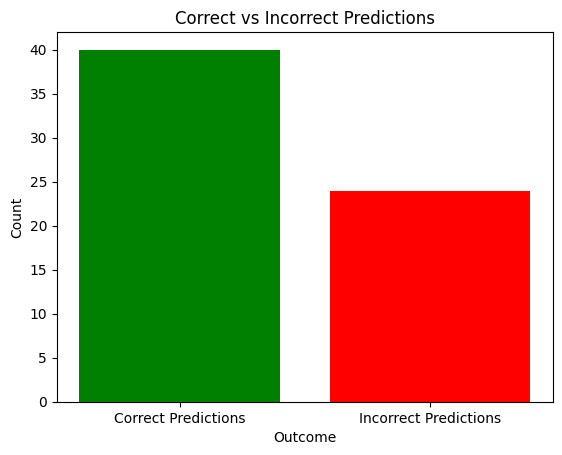

In [5]:
# Plotting
plt.bar(results['Outcome'], results['Count'], color=['green', 'red'])
plt.title('Correct vs Incorrect Predictions')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

Now starting the linear regressions:

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression

X = df[['spi1', 'spi2', 'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2']]  # independent variables
y = df[['score1', 'score2']]  # dependent variables

# linear regression model
model = LinearRegression()

model.fit(X, y['score1'])

coefficients_score1 = model.coef_

model.fit(X, y['score2'])

coefficients_score2 = model.coef_

# coefficients for both variables
print(f"Coefficients for score1: {coefficients_score1}")
print(f"Coefficients for score2: {coefficients_score2}")


Coefficients for score1: [ 6.32130289e-03 -2.90055259e-03 -8.11642038e+03 -8.12402975e+03
 -8.12388218e+03 -1.08908890e+00  9.41405656e-01]
Coefficients for score2: [-5.04428940e-02  1.26901296e-02  3.17368722e+03  3.16829057e+03
  3.17057670e+03 -4.25341407e-01  1.52755586e+00]


In [7]:
df['SpiDif'] = df['spi2']	- df['spi1']
df.head()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,score1,score2,Winner,predicted_winner,actual_winner,SpiDif
0,2022-11-20,1908,FIFA World Cup,Qatar,Ecuador,51.00,72.74,0.2369,0.5045,0.2586,1.13,1.75,0,2,2,2,2,21.74
1,2022-11-21,1908,FIFA World Cup,England,Iran,85.96,62.17,0.6274,0.1187,0.2539,1.70,0.58,6,2,1,1,1,-23.79
2,2022-11-21,1908,FIFA World Cup,Senegal,Netherlands,73.84,86.01,0.2235,0.5053,0.2712,0.99,1.63,0,2,2,2,2,12.17
3,2022-11-21,1908,FIFA World Cup,USA,Wales,74.83,65.58,0.4489,0.2591,0.2920,1.42,1.01,1,1,0,1,2,-9.25
4,2022-11-22,1908,FIFA World Cup,Argentina,Saudi Arabia,87.21,56.87,0.7228,0.0807,0.1966,2.11,0.54,1,2,2,1,2,-30.34


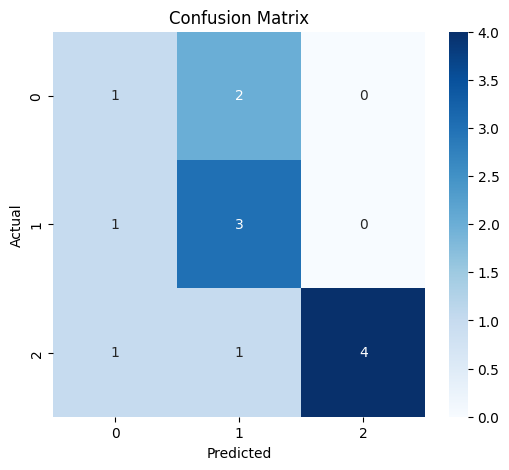

0.6153846153846154
Feature importances (coefficients) from the Decision Tree model:
SpiDif: 0.1928838887274095
prob1: 0.23693969030154852
prob2: 0.05291517773180363
probtie: 0.2369751820595736
proj_score1: 0.07481662591687042
proj_score2: 0.20546943526279443


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

X = df[['SpiDif', 'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2']]  # independent variables
y = df[['Winner']]  # dependent variables

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# decision tree model
model = DecisionTreeClassifier(random_state=42)

cart = model.fit(X_train_scaled, y_train['Winner'])

cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

print("Feature importances (coefficients) from the Decision Tree model:")
for feature, importance in zip(X.columns, model.feature_importances_):
    print(f"{feature}: {importance}")